In [4]:
from google.colab import drive
import sys
import os
import time

import pandas as pd

drive.mount('/content/drive')  ### conect to drive
path='/content/drive/MyDrive/cod/RL_DS/Lotka_volterra'
os.chdir(path) ### setting a Working directory on drive path
sys.path.append(path+'/')  ###setting path to read user defined functions

Mounted at /content/drive


In [5]:
from LotkaVolterra import LotkaVolterraModel
from scipy.optimize import minimize ## optimo local
from scipy.optimize import differential_evolution, dual_annealing, basinhopping, shgo, brute ## optimo global


In [6]:
P = [0.002, 0.04, 0.1, 0.0025] # Valor inicial de los parametros
Lim = [[0.0015,0.0025],[0.03,0.05],[0.05,0.15],[0.002,0.003]] #


def objective(P):
  lv=LotkaVolterraModel(*P)
  return -lv.simulate()




In [7]:
objective(P)

np.float64(-39.97034792759246)

In [ ]:
#result= minimize(objective, P,bounds=Lim )

In [ ]:
#result
#objective(result.x)

np.float64(-80.10988274018814)

In [ ]:
#result2= differential_evolution(objective,Lim)

In [ ]:
# result2.x
# objective(result2.x)

np.float64(-87.88031443429456)

In [ ]:

# methods = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'L-BFGS-B', 'TNC', 'SLSQP', 'trust-constr', 'dogleg', 'trust-ncg', 'trust-exact']
# results = []

# for method in methods:
#     try:
#         start_time = time.time()
#         result = minimize(objective, P, bounds=Lim, method=method)
#         end_time = time.time()
#         results.append({
#             'Method': method,
#             'Success': result.success,
#             'Optimal Parameters': result.x,
#             'Objective Value': -result.fun, #negate since we minimized the negative
#             'Iterations': result.nit,
#             'Time (seconds)': end_time - start_time
#         })
#     except Exception as e:
#         print(f"Error with method {method}: {e}")

# # Create a DataFrame from the results list

# df = pd.DataFrame(results)
# df.sort_values(by='Objective Value', ascending=False)


<ipython-input-39-22196bde175c>:8: RuntimeWarning: Method CG cannot handle bounds.
  result = minimize(objective, P, bounds=Lim, method=method)
/content/drive/MyDrive/cod/RL_DS/Lotka_volterra/LotkaVolterra.py:32: RuntimeWarning: overflow encountered in scalar multiply
  wolves_birth = self.alpha * (rabbits * wolves)
/content/drive/MyDrive/cod/RL_DS/Lotka_volterra/LotkaVolterra.py:36: RuntimeWarning: overflow encountered in scalar multiply
  rabbits_death = self.gamma * (rabbits * wolves)
/content/drive/MyDrive/cod/RL_DS/Lotka_volterra/LotkaVolterra.py:29: RuntimeWarning: invalid value encountered in scalar subtract
  wolves += (wolves_birth - wolves_death) * self.dt
/content/drive/MyDrive/cod/RL_DS/Lotka_volterra/LotkaVolterra.py:32: RuntimeWarning: overflow encountered in scalar multiply
  wolves_birth = self.alpha * (rabbits * wolves)
/content/drive/MyDrive/cod/RL_DS/Lotka_volterra/LotkaVolterra.py:36: RuntimeWarning: overflow encountered in scalar multiply
  rabbits_death = self.gam

Error with method dogleg: Jacobian is required for dogleg minimization
Error with method trust-ncg: Jacobian is required for Newton-CG trust-region minimization
Error with method trust-exact: Jacobian is required for trust region exact minimization.


<ipython-input-39-22196bde175c>:8: RuntimeWarning: Method dogleg cannot handle bounds.
  result = minimize(objective, P, bounds=Lim, method=method)
<ipython-input-39-22196bde175c>:8: RuntimeWarning: Method trust-ncg cannot handle bounds.
  result = minimize(objective, P, bounds=Lim, method=method)
<ipython-input-39-22196bde175c>:8: RuntimeWarning: Method trust-exact cannot handle bounds.
  result = minimize(objective, P, bounds=Lim, method=method)


,Method,Success,Optimal Parameters,Objective Value,Iterations,Time (seconds)
1,Powell,True,"[0.0024999957245487895, 0.030000415023117566, ...",85.263357,6,21.172274
5,TNC,True,"[0.0025, 0.042843719085909705, 0.15, 0.002]",84.205548,8,6.864436
0,Nelder-Mead,True,"[0.0024999999999999996, 0.04283313865696524, 0...",84.205514,57,5.905792
4,L-BFGS-B,True,"[0.0015, 0.05, 0.15, 0.002]",80.109883,1,0.438759
6,SLSQP,True,"[0.0016395532784845273, 0.04998436812858472, 0...",61.952507,6,0.439905
2,CG,False,"[0.002, 0.04, 0.1, 0.0025]",39.970348,0,2.848392
3,BFGS,False,"[0.002, 0.04, 0.1, 0.0025]",39.970348,0,2.873263
7,trust-constr,False,"[0.002, 0.04, 0.1, 0.0025]",39.970348,1000,3.356960


In [ ]:

# # Global optimization methods and their explanations
# methods = {
#     "differential_evolution": "Stochastic population-based method, robust for complex landscapes.",
#     "dual_annealing": "Combines simulated annealing with local search, good for global exploration.",
#     "basinhopping": "Combines Metropolis-Hastings with local minimization, explores basins of attraction.",
#     "shgo": "Simplicial homology global optimization, explores the topology of the search space.",
#     "brute": "Brute-force search (grid-based), guarantees finding the global optimum but can be slow."
# }

# results = []

# for method_name, explanation in methods.items():
#     start_time = time.time()

#     if method_name == "differential_evolution":
#         result = differential_evolution(objective, Lim)
#     elif method_name == "dual_annealing":
#         result = dual_annealing(objective, bounds=Lim)
#     elif method_name == "basinhopping":
#         result = basinhopping(objective, P, minimizer_kwargs={"method": "L-BFGS-B", "bounds": Lim})
#     elif method_name == "shgo":
#         result = shgo(objective, bounds=Lim)
#     elif method_name == "brute":
#         # Define ranges for brute-force search
#         ranges = [slice(start, stop, (stop - start) / 50) for start, stop in Lim]  # Adjust 50 for grid density
#         result = brute(objective, ranges=ranges, full_output=True, finish=None)
#         result = {  # Create a dictionary like other methods
#             'x': result[0],
#             'fun': result[1]
#         }

#     end_time = time.time()

#     results.append({
#         "Method": method_name,
#         "Suitability Explanation": explanation,
#         "Time (seconds)": end_time - start_time,
#         "Average Wolf Population": -result['fun'] if 'fun' in result else -result.fun,
#         "Optimal Parameters": result['x'] if 'x' in result else result.x  # Access 'x' if available
#     })

# df = pd.DataFrame(results)
# print(df)

                   Method                            Suitability Explanation  \
0  differential_evolution  Stochastic population-based method, robust for...   
1          dual_annealing  Combines simulated annealing with local search...   
2            basinhopping  Combines Metropolis-Hastings with local minimi...   
3                    shgo  Simplicial homology global optimization, explo...   

   Time (seconds)  Average Wolf Population           Optimal Parameters  
0       89.220366                87.880314  [0.0025, 0.03, 0.15, 0.002]  
1      403.586849                87.880314  [0.0025, 0.03, 0.15, 0.002]  
2       49.249872                87.880314  [0.0025, 0.03, 0.15, 0.002]  
3        1.183980                87.880314  [0.0025, 0.03, 0.15, 0.002]  


#Experimentos

In [14]:

# --- 2. Set up the Experiment ---
N_RUNS = 15
MAX_ITER = 40

In [21]:
import pandas as pd
import numpy as np
from scipy.optimize import differential_evolution




# --- 2. Set up the Experiment ---
N_RUNS = 15
MAX_ITER = 40
all_runs_data = [] # A list to store data from all runs and iterations.

print(f"Starting {N_RUNS} runs of Differential Evolution...")

# --- 3. Run the Experiment ---
for i in range(N_RUNS):
    time1=time.time()

    time_start = [0] # A list to hold the start time of each run.
    time_end = [0]
    time_start[0] = time.time()

    # CORRECTED PART: Use a list to hold the counter
    counter = [0]

    def callback_fn(xk, convergence):

        objective_value = objective(xk)
        # Access and modify the counter via its index.


        time_end[0] = time.time()
        time_it = np.round(time_end[0] - time_start[0],3)
        time_start[0]=time_end[0]

        all_runs_data.append([i, counter[0], objective_value, time_it])

        counter[0] += 1

    # Run the differential evolution algorithm
    result = differential_evolution(
        objective,
        bounds=Lim,
        maxiter=MAX_ITER,
        callback=callback_fn,
        disp=False,
        tol=0
    )
    time2 = time.time()
    time_it2 = np.round(time2 - time1,3)
    print(f"Finished Run {i+1}/{N_RUNS}. Final value: {result.fun:.4f} Tiem Run: {time_it2:2f}")



# --- 4. Create and Analyze the DataFrame ---
df_results = pd.DataFrame(all_runs_data, columns=['Run', 'Iteration', 'Objective Value', "tiempo_it_seg"])



grouped_by_iter = df_results.groupby('Iteration')['Objective Value']
median_values = grouped_by_iter.quantile(0.5)*-1
lower_quantile = grouped_by_iter.quantile(0.05)*-1
upper_quantile = grouped_by_iter.quantile(0.95)*-1

Starting 15 runs of Differential Evolution...
Finished Run 1/15. Final value: -87.8803 Tiem Run: 130.709000
Finished Run 2/15. Final value: -87.8803 Tiem Run: 129.910000
Finished Run 3/15. Final value: -87.8803 Tiem Run: 133.781000
Finished Run 4/15. Final value: -87.8803 Tiem Run: 131.068000
Finished Run 5/15. Final value: -87.8803 Tiem Run: 131.264000
Finished Run 6/15. Final value: -87.8803 Tiem Run: 131.309000
Finished Run 7/15. Final value: -87.8803 Tiem Run: 131.365000
Finished Run 8/15. Final value: -87.8803 Tiem Run: 132.471000
Finished Run 9/15. Final value: -84.2055 Tiem Run: 131.177000
Finished Run 10/15. Final value: -87.8803 Tiem Run: 127.749000
Finished Run 11/15. Final value: -87.8803 Tiem Run: 131.520000
Finished Run 12/15. Final value: -87.8803 Tiem Run: 130.819000
Finished Run 13/15. Final value: -87.8803 Tiem Run: 131.972000
Finished Run 14/15. Final value: -87.8803 Tiem Run: 133.857000
Finished Run 15/15. Final value: -87.8803 Tiem Run: 131.060000


In [20]:
df_results.to_csv('resultados/DE_lotka_volterra_results.csv', index=False)
df_results.to_excel('resultados/DE_lotka_volterra_results.xlsx', index=False)

,Run,Iteration,Objective Value,tiempo_it_seg
0,0,0,-79.211367,5.405
1,0,1,-79.211367,2.825
2,0,2,-83.314417,4.469
3,0,3,-83.314417,2.732
4,0,4,-83.314417,2.716
5,0,5,-83.314417,2.693
6,0,6,-83.314417,4.182
7,0,7,-83.314417,3.127
8,0,8,-83.314417,2.703
9,0,9,-84.658999,2.691


In [ ]:
df_results=pd.read_csv('resultados/DE_lotka_volterra_results.csv')

grouped_by_iter = df_results.groupby('Iteration')['Objective Value']
median_values = grouped_by_iter.quantile(0.5)*-1
lower_quantile = grouped_by_iter.quantile(0.05)*-1
upper_quantile = grouped_by_iter.quantile(0.95)*-1

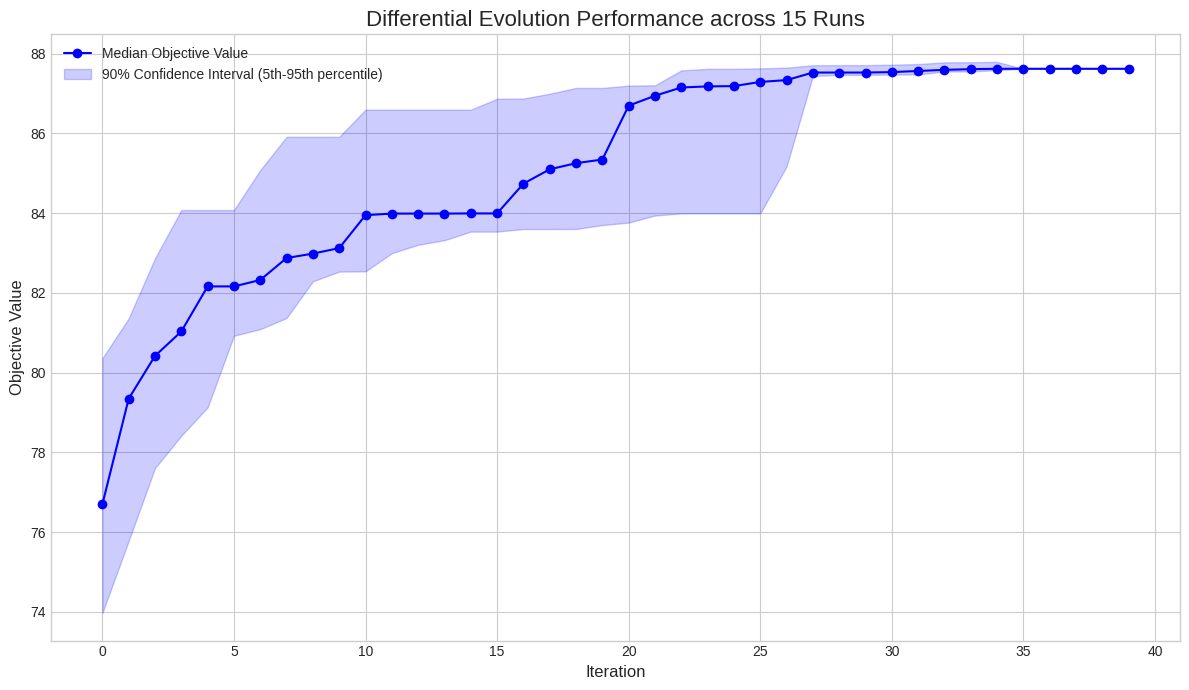

In [15]:
import matplotlib.pyplot as plt
# --- 5. Graph the Results ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(median_values.index, median_values, 'o-', color='blue', label='Median Objective Value')
ax.fill_between(
    lower_quantile.index,
    lower_quantile,
    upper_quantile,
    color='blue',
    alpha=0.2,
    label='90% Confidence Interval (5th-95th percentile)'
)

ax.set_title(f'Differential Evolution Performance across {N_RUNS} Runs', fontsize=16)
ax.set_xlabel('Iteration', fontsize=12)
ax.set_ylabel('Objective Value', fontsize=12)
ax.legend(fontsize=10)
#ax.set_xticks(range(MAX_ITER + 1))
#plt.yscale('log')
plt.tight_layout()
plt.show()

